## Load data files

In [1]:
import codecs
import re
from tensorflow.keras.utils import to_categorical
import numpy as np

def load_data(filename):
    with codecs.open(filename, 'r', 'utf-8') as f:
        x, y = zip(*[d.strip().split('\t') for d in f])
    # Reducing any char-acter sequence of more than 3 consecutive repetitions to a respective 3-character sequence 
    # (e.g. “!!!!!!!!”turns to “!!!”)
    # x = [re.sub(r'((.)\2{3,})', r'\2\2\2', i) for i in x]
    x = np.asarray(list(x))
    y = to_categorical(y, 3)
    
    return x, y
    
x_token_train, y_token_train = load_data('data/token_train.tsv')
x_token_test, y_token_test = load_data('data/token_test.tsv')
x_morph_train, y_morph_train = load_data('data/morph_train.tsv')
x_morph_test, y_morph_test = load_data('data/morph_test.tsv')

print('X token train shape: {}'.format(x_token_train.shape))
print('X token test shape: {}'.format(x_token_test.shape))

print('X morph train shape: {}'.format(x_morph_train.shape))
print('X morph test shape: {}'.format(x_morph_test.shape))

X token train shape: (10244,)
X token test shape: (2560,)
X morph train shape: (10244,)
X morph test shape: (2560,)


In [2]:
print(x_token_train[:5])

['ממש כואב ..... אני בוכה עם המשפחה שלא תדעו עוד צער' 'איש יקר שלנו'
 'כל הכבוד והמון בהצלחה'
 '" תל חי , רובי . בכל העצב הזה היית קרן אור של תקוה . אכן יש נשיא בישראל "'
 'נקי כפיים ובר לבב בהצלחה לך ולנו .']


In [3]:
print(x_token_test[:5])

['" שמע ישראל , השם ישמור ויקרא הגורל = ( י.ק.ו.ק . ) אימרו אמן לאבא השם שלנו ! ! ! ! אחרי ברכה של ביבי ! הכח בישראל הוא מתי שיש משמעת ופרגמתיות במשרדי החינוך שזה איתן את האור ! שמאוד חסר לנו ! , והתאחדות באחד שלם , ואין שמאל ואין ימין ! ובישראל נקודה חשובה היא , תעשיית כוח פרגמטיבית ! https://www.youtube.com/watch?v=_rKMXgPQSj8 . עוד מעת אהיה ראש חודש תעברו על ה תפילה של התיקון הכללי ו תדליקו את הנר ! "'
 'איחולי הצלחה בתפקידך .' 'כל הכבוד !!!'
 '" בוקר טוב ישראל בוקר טוב לכבוד נשיא מדינת ישראל . ״ אשרי העם שנבחר אדם עשיר בענווה , יושרה ודעת ״ מי ייתן ותאחד את עמך ישראל . יישר כוח . עופר אלפסי מאילת . "'
 'איפה הגינוי ? http://www.iba.org.il/bet/bet.aspx?type=1&entity=1023105']


In [4]:
print(x_morph_train[:5])

['ממש כואב ..... אני בכה את היא עם ה משפחה ש לא תדעו עוד צער'
 'איש יקר של אנחנו' 'כל ה כבוד ו המון ב הצלחה'
 '" תל חי , רובי . ב כל ה עצב ה זה היית קרן אור של תקוה . אכן יש נשיא ב ישראל "'
 'נקי כפיים ו בר לבב ב הצלחה ל אתה ו ל אנחנו .']


In [5]:
print(x_morph_test[:5])

['" שמע ישראל , ה שם ישמור ו יקרא ה גורל =  ( י.ק.ו.ק . ) אימרו אמן ל אבא ה שם של אנחנו ! ! ! ! אחרי ברכה של ביבי ! ה כח ב ה ישראל הוא מתי ש יש משמעת ו פרגמתיות ב משרדי ה חינוך ש זה איתן את ה אור ! ש מאוד חסר ל אנחנו ! , ו התאחדות ב אחד שלם , ו אין שמאל ו אין ימין ! ו ב ישראל נקודה חשובה היא , תעשיית כוח פרגמטיבית ! https://www.youtube.com/watch?v=_rKMXgPQSj8 . עוד מעת אהיה ראש חודש תעברו על ה תפילה של ה תיקון ה כללי ו תדליקו את ה נר ! "'
 'איחולי הצלחה ב תפקידך .' 'כל ה כבוד !!!'
 '" בוקר טוב ישראל בוקר טוב לכבוד נשיא מדינת ישראל . ״ אשרי ה עם ש נבחר אדם עשיר ב ענווה , יושרה ו דעת ״  מי ייתן ו תאחד את עמך ישראל . יישר כוח . עופר אלפסי מאילת . "'
 'איפה ה גינוי ? http://www.iba.org.il/bet/bet.aspx?type=1&entity=1023105']


## Prepare
Convert text (train & test) to sequences and pad to requested document length

In [6]:
from tensorflow.keras.preprocessing import text, sequence

def tokenizer(x_train, x_test, vocabulary_size, char_level):
    tokenize = text.Tokenizer(num_words=vocabulary_size, 
                              char_level=char_level,
                              filters='')
    tokenize.fit_on_texts(x_train)  # only fit on train
    #print('UNK index: {}'.format(tokenize.word_index['UNK']))
    
    x_train = tokenize.texts_to_sequences(x_train)
    x_test = tokenize.texts_to_sequences(x_test)
    
    return x_train, x_test

def pad(x_train, x_test, max_document_length):
    x_train = sequence.pad_sequences(x_train, maxlen=max_document_length, padding='post', truncating='post')
    x_test = sequence.pad_sequences(x_test, maxlen=max_document_length, padding='post', truncating='post')
    
    return x_train, x_test

vocabulary_size = 5000

x_token_train, x_token_test = tokenizer(x_token_train, x_token_test, vocabulary_size, False)
x_morph_train, x_morph_test = tokenizer(x_morph_train, x_morph_test, vocabulary_size, False)

max_document_length = 100

x_token_train, x_token_test = pad(x_token_train, x_token_test, max_document_length)
x_morph_train, x_morph_test = pad(x_morph_train, x_morph_test, max_document_length)

print('X token train shape: {}'.format(x_token_train.shape))
print('X token test shape: {}'.format(x_token_test.shape))

print('X morph train shape: {}'.format(x_morph_train.shape))
print('X morph test shape: {}'.format(x_morph_test.shape))

X token train shape: (10244, 100)
X token test shape: (2560, 100)
X morph train shape: (10244, 100)
X morph test shape: (2560, 100)


In [7]:
print('Token OOV ratio: {} ({} out of 28787)'.format(np.count_nonzero(x_token_test == 28787)/28787, np.count_nonzero(x_token_test == 28787)))
print('Morph OOV ratio: {} ({} out of 18912)'.format(np.count_nonzero(x_morph_test == 18912)/18912, np.count_nonzero(x_morph_test == 18912)))

Token OOV ratio: 0.0 (0 out of 28787)
Morph OOV ratio: 0.0 (0 out of 18912)


## Plot function

In [8]:
import matplotlib.pyplot as plt

def plot_loss_and_accuracy(history, model_name, dataset_kind):
    
    fig, axs = plt.subplots(1, 2, sharex=True)
    
    axs[0].plot(history.history['loss'])
    axs[0].plot(history.history['val_loss'])
    axs[0].set_title('Model Loss')
    axs[0].legend(['Train', 'Validation'], loc='upper left')
    
    axs[1].plot(history.history['accuracy'])
    axs[1].plot(history.history['val_accuracy'])
    axs[1].set_title('Model Accuracy')
    axs[1].legend(['Train', 'Validation'], loc='upper left')
    
    fig.suptitle('{}-{}'.format(model_name, dataset_kind), fontsize=16)
    fig.tight_layout()
    plt.show()

## Import required modules from Keras

In [9]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import layers, optimizers, metrics

## Experiment setup

In [10]:
import os
try:
    os.mkdir('word_saved_models')
except FileExistsError:
    pass

dropout_keep_prob = 0.5
embedding_size = 300

token_dataset = ("Token", (x_token_train, y_token_train), (x_token_test, y_token_test))
morph_dataset = ("Morph", (x_morph_train, y_morph_train), (x_morph_test, y_morph_test))

def run_experiment(model, dataset, num_epochs,
                   optimizer=optimizers.Adam(lr=1e-4),
                   batch_size=50,
                   dev_size=0.2):
    [dataset_kind, (x_train, y_train), (x_test, y_test)] = dataset
    
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    
    # Train the model
    history = model.fit(x_train, y_train,
                        batch_size=batch_size,
                        epochs=num_epochs,
                        verbose=1,
                        validation_split=dev_size)

    # Plot training accuracy and loss
    plot_loss_and_accuracy(history, model.name, dataset_kind)

    # Evaluate the model
    [_, accuracy, *_] = model.evaluate(x_test, y_test, batch_size=batch_size, verbose=1)
    print()
    print('Accuracy: {:.4f}'.format(accuracy))

    # Save the model
    model.save('word_saved_models/{}-{}-{:.3f}.h5'.format(model.name, dataset_kind, accuracy * 100))

## Linear

In [11]:
def construct_linear():
    return Sequential([
        layers.Input(shape=(max_document_length,)),
        layers.Dense(100),
        layers.Dense(3, activation='softmax')
    ], name="Linear")

### Linear - Token

Epoch 1/10
164/164 [==============================] - 1s 3ms/step - loss: 190.9581 - accuracy: 0.5140 - val_loss: 115.2639 - val_accuracy: 0.6291
Epoch 2/10
164/164 [==============================] - 0s 2ms/step - loss: 92.9408 - accuracy: 0.5955 - val_loss: 65.4469 - val_accuracy: 0.6462
Epoch 3/10
164/164 [==============================] - 0s 2ms/step - loss: 55.5130 - accuracy: 0.6073 - val_loss: 42.6661 - val_accuracy: 0.6589
Epoch 4/10
164/164 [==============================] - 0s 2ms/step - loss: 35.3865 - accuracy: 0.6155 - val_loss: 31.2421 - val_accuracy: 0.5364
Epoch 5/10
164/164 [==============================] - 0s 2ms/step - loss: 24.2313 - accuracy: 0.6214 - val_loss: 24.4337 - val_accuracy: 0.6418
Epoch 6/10
164/164 [==============================] - 0s 2ms/step - loss: 18.1606 - accuracy: 0.6225 - val_loss: 18.3062 - val_accuracy: 0.6554
Epoch 7/10
164/164 [==============================] - 0s 2ms/step - loss: 14.0054 - accuracy: 0.6238 - val_loss: 16.6209 - val_accurac

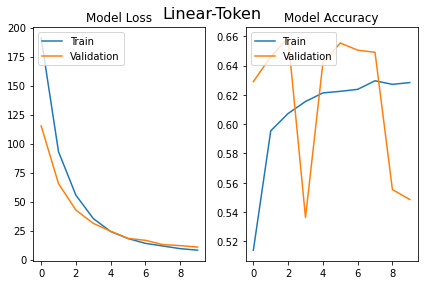

52/52 [==============================] - 0s 2ms/step - loss: 13.7095 - accuracy: 0.5461

Accuracy: 0.5461


In [12]:
run_experiment(construct_linear(), token_dataset, num_epochs=10)

### Linear - Morph

Epoch 1/10
164/164 [==============================] - 0s 3ms/step - loss: 118.7563 - accuracy: 0.5539 - val_loss: 60.8787 - val_accuracy: 0.5935
Epoch 2/10
164/164 [==============================] - 0s 2ms/step - loss: 41.4898 - accuracy: 0.5907 - val_loss: 33.4933 - val_accuracy: 0.6257
Epoch 3/10
164/164 [==============================] - 0s 2ms/step - loss: 23.2472 - accuracy: 0.6087 - val_loss: 18.9770 - val_accuracy: 0.6110
Epoch 4/10
164/164 [==============================] - 0s 2ms/step - loss: 14.5355 - accuracy: 0.6023 - val_loss: 15.1386 - val_accuracy: 0.5852
Epoch 5/10
164/164 [==============================] - 0s 2ms/step - loss: 11.3570 - accuracy: 0.6193 - val_loss: 12.3346 - val_accuracy: 0.6042
Epoch 6/10
164/164 [==============================] - 0s 2ms/step - loss: 9.6818 - accuracy: 0.6209 - val_loss: 11.2899 - val_accuracy: 0.6467
Epoch 7/10
164/164 [==============================] - 0s 2ms/step - loss: 8.6330 - accuracy: 0.6105 - val_loss: 10.2450 - val_accuracy: 

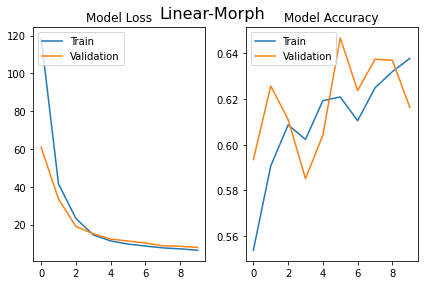

52/52 [==============================] - 0s 2ms/step - loss: 8.1796 - accuracy: 0.6223

Accuracy: 0.6223


In [13]:
run_experiment(construct_linear(), morph_dataset, num_epochs=10)

## CNN

In [14]:
def construct_cnn():
    text_input = layers.Input(shape=(max_document_length,))
    x = layers.Embedding(vocabulary_size, embedding_size)(text_input)
    convs = [layers.MaxPool1D()(layers.Conv1D(128, fsz, padding='valid', activation='relu')(x))
             for fsz in [3, 8]]
    x = layers.Concatenate(axis=1)(convs)
    x = layers.Flatten()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(dropout_keep_prob)(x)
    preds = layers.Dense(3, activation='softmax')(x)

    return Model(text_input, preds, name="CNN")

### CNN - Token

Epoch 1/5
164/164 [==============================] - 3s 20ms/step - loss: 0.5658 - accuracy: 0.7730 - val_loss: 0.4082 - val_accuracy: 0.8492
Epoch 2/5
164/164 [==============================] - 3s 18ms/step - loss: 0.3046 - accuracy: 0.8964 - val_loss: 0.3442 - val_accuracy: 0.8775
Epoch 3/5
164/164 [==============================] - 3s 18ms/step - loss: 0.2035 - accuracy: 0.9322 - val_loss: 0.3330 - val_accuracy: 0.8873
Epoch 4/5
164/164 [==============================] - 3s 18ms/step - loss: 0.1529 - accuracy: 0.9479 - val_loss: 0.3453 - val_accuracy: 0.8887
Epoch 5/5
164/164 [==============================] - 3s 18ms/step - loss: 0.1181 - accuracy: 0.9606 - val_loss: 0.3620 - val_accuracy: 0.8936


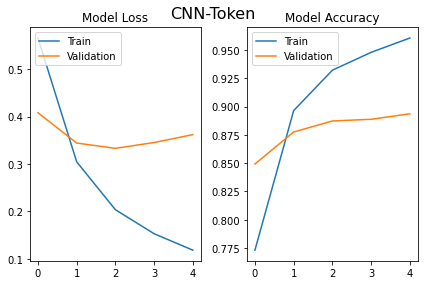

52/52 [==============================] - 0s 5ms/step - loss: 0.3046 - accuracy: 0.9094

Accuracy: 0.9094


In [15]:
run_experiment(construct_cnn(), token_dataset, num_epochs=5)

### CNN - Morph

Epoch 1/5
164/164 [==============================] - 3s 19ms/step - loss: 0.5621 - accuracy: 0.7760 - val_loss: 0.4160 - val_accuracy: 0.8468
Epoch 2/5
164/164 [==============================] - 3s 18ms/step - loss: 0.3091 - accuracy: 0.8921 - val_loss: 0.3428 - val_accuracy: 0.8780
Epoch 3/5
164/164 [==============================] - 3s 18ms/step - loss: 0.2116 - accuracy: 0.9314 - val_loss: 0.3169 - val_accuracy: 0.8917
Epoch 4/5
164/164 [==============================] - 3s 18ms/step - loss: 0.1585 - accuracy: 0.9453 - val_loss: 0.3260 - val_accuracy: 0.8980
Epoch 5/5
164/164 [==============================] - 3s 18ms/step - loss: 0.1166 - accuracy: 0.9614 - val_loss: 0.3440 - val_accuracy: 0.9004


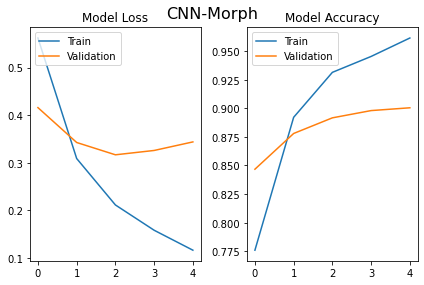

52/52 [==============================] - 0s 5ms/step - loss: 0.3420 - accuracy: 0.9031

Accuracy: 0.9031


In [16]:
run_experiment(construct_cnn(), morph_dataset, num_epochs=5)

## LSTM

In [17]:
def construct_lstm(units=93):
    return Sequential([
        layers.Embedding(vocabulary_size, embedding_size, input_length=max_document_length),
        layers.LSTM(units, return_sequences=True),
        layers.LSTM(units),
        layers.Dense(128, activation='relu'),
        layers.Dropout(dropout_keep_prob),
        layers.Dense(3, activation='softmax'),
    ], name="LSTM")

## LSTM - Token

Epoch 1/5
164/164 [==============================] - 5s 28ms/step - loss: 0.7650 - accuracy: 0.6593 - val_loss: 0.7656 - val_accuracy: 0.6593
Epoch 2/5
164/164 [==============================] - 4s 23ms/step - loss: 0.7393 - accuracy: 0.6696 - val_loss: 0.7392 - val_accuracy: 0.6681s - loss: 0.7436 - accura
Epoch 3/5
164/164 [==============================] - 4s 23ms/step - loss: 0.7349 - accuracy: 0.6780 - val_loss: 0.7269 - val_accuracy: 0.6837
Epoch 4/5
164/164 [==============================] - 4s 23ms/step - loss: 0.7062 - accuracy: 0.7005 - val_loss: 0.6455 - val_accuracy: 0.7438
Epoch 5/5
164/164 [==============================] - 4s 22ms/step - loss: 0.5684 - accuracy: 0.8089 - val_loss: 0.5705 - val_accuracy: 0.8023


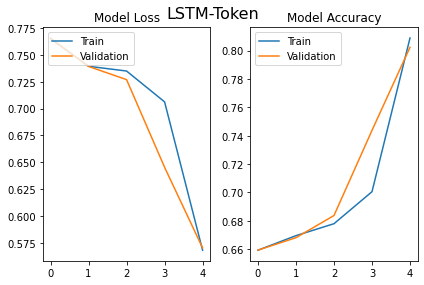

52/52 [==============================] - 0s 7ms/step - loss: 0.5426 - accuracy: 0.8152

Accuracy: 0.8152


In [18]:
run_experiment(construct_lstm(), token_dataset, num_epochs=5)

## LSTM - Morph

Epoch 1/4
164/164 [==============================] - 5s 28ms/step - loss: 0.7567 - accuracy: 0.6710 - val_loss: 0.7291 - val_accuracy: 0.6891- los - ETA: 1s - los - ETA: 1s
Epoch 2/4
164/164 [==============================] - 4s 23ms/step - loss: 0.7210 - accuracy: 0.6962 - val_loss: 0.7057 - val_accuracy: 0.6989
Epoch 3/4
164/164 [==============================] - 4s 23ms/step - loss: 0.5711 - accuracy: 0.7979 - val_loss: 0.4634 - val_accuracy: 0.8214
Epoch 4/4
164/164 [==============================] - 4s 23ms/step - loss: 0.3806 - accuracy: 0.8790 - val_loss: 0.3902 - val_accuracy: 0.8599


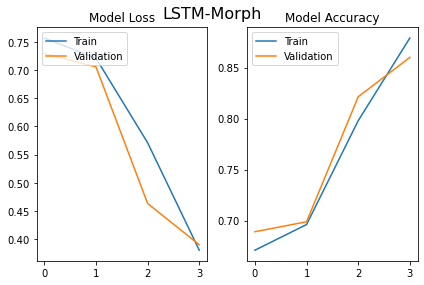

52/52 [==============================] - 0s 7ms/step - loss: 0.3703 - accuracy: 0.8766

Accuracy: 0.8766


In [19]:
run_experiment(construct_lstm(), morph_dataset, num_epochs=4)

## BiLSTM

In [ ]:
def construct_bilstm(units=93):
    return Sequential([
        layers.Embedding(vocabulary_size, embedding_size, input_length=max_document_length),
        layers.Bidirectional(layers.LSTM(units, return_sequences=True)),
        layers.Bidirectional(layers.LSTM(units)),
        layers.Dense(128, activation='relu'),
        layers.Dropout(dropout_keep_prob),
        layers.Dense(3, activation='softmax'),
    ], name="BiLSTM")    

### BiLSTM - Token

In [ ]:
run_experiment(construct_bilstm(), token_dataset, num_epochs=4)

### BiLSTM - Morph

In [ ]:
run_experiment(construct_bilstm(), morph_dataset, num_epochs=4)

## MLP

In [23]:
def construct_mlp():
    return Sequential([
        layers.Embedding(vocabulary_size, embedding_size, input_length=max_document_length),
        layers.Flatten(),
        layers.Dense(256, activation='relu'), layers.Dropout(dropout_keep_prob),
        layers.Dense(128, activation='relu'), layers.Dropout(dropout_keep_prob),
        layers.Dense(64,  activation='relu'), layers.Dropout(dropout_keep_prob),
        layers.Dense(3, activation='softmax')
    ], name="MLP")

## MLP - Token

Epoch 1/6
164/164 [==============================] - 3s 15ms/step - loss: 0.7707 - accuracy: 0.6570 - val_loss: 0.6525 - val_accuracy: 0.7301
Epoch 2/6
164/164 [==============================] - 2s 15ms/step - loss: 0.5863 - accuracy: 0.7668 - val_loss: 0.4506 - val_accuracy: 0.8272
Epoch 3/6
164/164 [==============================] - 2s 15ms/step - loss: 0.3912 - accuracy: 0.8661 - val_loss: 0.3603 - val_accuracy: 0.8668
Epoch 4/6
164/164 [==============================] - 2s 15ms/step - loss: 0.2804 - accuracy: 0.9121 - val_loss: 0.3306 - val_accuracy: 0.8780
Epoch 5/6
164/164 [==============================] - 2s 15ms/step - loss: 0.2036 - accuracy: 0.9375 - val_loss: 0.3197 - val_accuracy: 0.8907
Epoch 6/6
164/164 [==============================] - 2s 15ms/step - loss: 0.1563 - accuracy: 0.9502 - val_loss: 0.3335 - val_accuracy: 0.8931


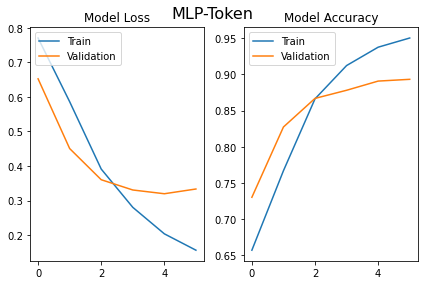

52/52 [==============================] - 0s 4ms/step - loss: 0.3171 - accuracy: 0.8992

Accuracy: 0.8992


In [24]:
run_experiment(construct_mlp(), token_dataset, num_epochs=6)

## MLP - Morph

Epoch 1/6
164/164 [==============================] - 3s 16ms/step - loss: 0.7685 - accuracy: 0.6692 - val_loss: 0.6694 - val_accuracy: 0.7267
Epoch 2/6
164/164 [==============================] - 2s 15ms/step - loss: 0.6141 - accuracy: 0.7561 - val_loss: 0.4841 - val_accuracy: 0.8209
Epoch 3/6
164/164 [==============================] - 2s 15ms/step - loss: 0.4083 - accuracy: 0.8563 - val_loss: 0.3660 - val_accuracy: 0.8604
Epoch 4/6
164/164 [==============================] - 3s 15ms/step - loss: 0.2754 - accuracy: 0.9126 - val_loss: 0.3362 - val_accuracy: 0.8795
Epoch 5/6
164/164 [==============================] - 2s 15ms/step - loss: 0.1971 - accuracy: 0.9394 - val_loss: 0.3345 - val_accuracy: 0.8843
Epoch 6/6
164/164 [==============================] - 2s 15ms/step - loss: 0.1516 - accuracy: 0.9523 - val_loss: 0.3603 - val_accuracy: 0.8868


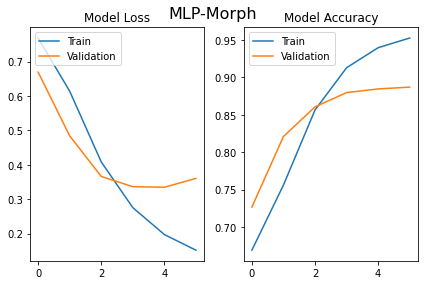

52/52 [==============================] - 0s 4ms/step - loss: 0.3593 - accuracy: 0.8918

Accuracy: 0.8918


In [25]:
run_experiment(construct_mlp(), morph_dataset, num_epochs=6)